In [144]:
#import libraries
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import skimage 
from skimage import io

## Import image

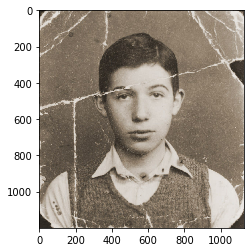

In [145]:
img = io.imread('dm4.jpg')
plt.imshow(img)

## Image restoration

These steps are to restore the image to a decent quality before it is fed to the CNN for auto colorisation. 
Steps are as follows:
- Denoising
- Edge detection
- Edge enhancement
- Inpainting

### Denoising
Remove the noise in the image using the denoising function for colored images.

(-0.5, 1127.5, 1199.5, -0.5)

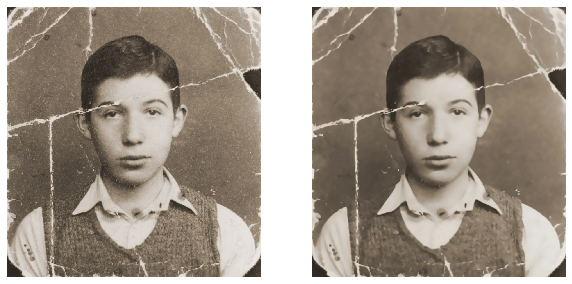

In [37]:
dst = cv.fastNlMeansDenoisingColored(img,None,10,10,6,21)

fig, axes = plt.subplots(ncols = 2, figsize = (10,5))

axes[0].imshow(img)
axes[0].axis('off')

axes[1].imshow(dst)
axes[1].axis('off')

### Edge detection
Sometimes old images have cracks or fold lines on them. After removing noise, edge detection should help detect these fold lines that are white and that run all across the image. The edge detection algorithm used here is Canny edge detection. 

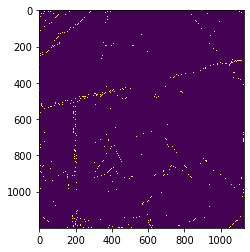

In [138]:
edges = cv.Canny(img,200,255)
plt.imshow(edges)

### Edge Enhancement

This step is carried out the enhance any strong edges or cracks present in the image. These enhanced edge lines are further used as guiding points or as a mask for our inpainting function. 

In order to enhance such folds or cracks in the picture we use opening followed by 2x dilation.

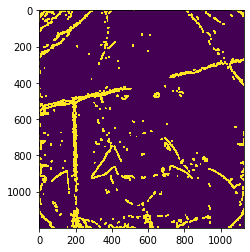

In [139]:
kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(edges, cv.MORPH_OPEN, kernel)
dilation = cv.dilate(edges,kernel,iterations = 2)
plt.imshow(dilation)

### Inpainting

The inpainting function uses a mask where missing areas are highlighted against a dark background. It then 'paints' any mixel pixels with a normalized value of all the surrounding pixels. The inpainting function is fed the mask from the previous image. 

In [142]:
dest = cv.inpaint(dst,dilation,5,cv.INPAINT_TELEA)

### Before vs after

(-0.5, 1127.5, 1199.5, -0.5)

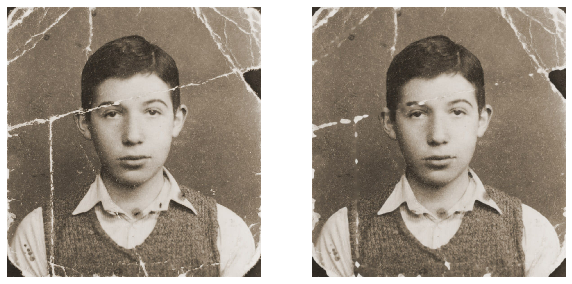

In [143]:
fig, axes = plt.subplots(ncols = 2, figsize = (10,5))

axes[0].imshow(img)
axes[0].axis('off')

axes[1].imshow(dest)
axes[1].axis('off')